In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
stations = pd.read_csv('C:\Asus WebStorage\psabin@gmail.com\MySyncFolder\Data Science Course\Capital Bikeshare\saved_stations')
stations.drop(['lat_dms', 'lng_dms', 'Unnamed: 0'], axis=1, inplace=True)


In [12]:
high_usage_stations = stations[stations['daily_usage'] > 4.685]
st_coordinates = high_usage_stations[['start_lat', 'start_lng']]
added_ratio = high_usage_stations['%_bikes_added']
net_total = high_usage_stations['net_total']

coordinates_train, coordinates_test, added_ratio_train, added_ratio_test = train_test_split(st_coordinates,added_ratio,test_size=0.2, random_state=1)
co_train, co_test, net_total_train, net_total_test = train_test_split(st_coordinates,net_total,test_size=0.2, random_state=1)

In [20]:
def model_accuracy_comparison_and_plot(X_train, y_train, X_test, y_test):
    # Create a dictionary of regression models
    reg_models = {
        'Decision Tree': DecisionTreeRegressor(),
        'Gradient Boosting Regressor': GradientBoostingRegressor(),
        'GB tuned': GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=300),
        'GB tuned net': GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=200)
    }

    for name, model in reg_models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        predictions = model.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)

        # Print the metrics
        print(f"{name}:")
        print(f" Mean Absolute Error: {mae:.2f}")
        print(f" Mean Squared Error: {mse:.2f}")
        print(f" Root Mean Squared Error: {rmse:.2f}")
        print(f" R-squared: {r2:.2f}\n")
        
        # Plotting the results
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, predictions, alpha=0.5)
        plt.plot(y_test, y_test, color='red')  # Line for perfect predictions
        plt.title(f'{name} Predictions vs Actual')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.show()

Gradient Boosting Regressor:
 Mean Absolute Error: 1.91
 Mean Squared Error: 6.94
 Root Mean Squared Error: 2.63
 R-squared: 0.38



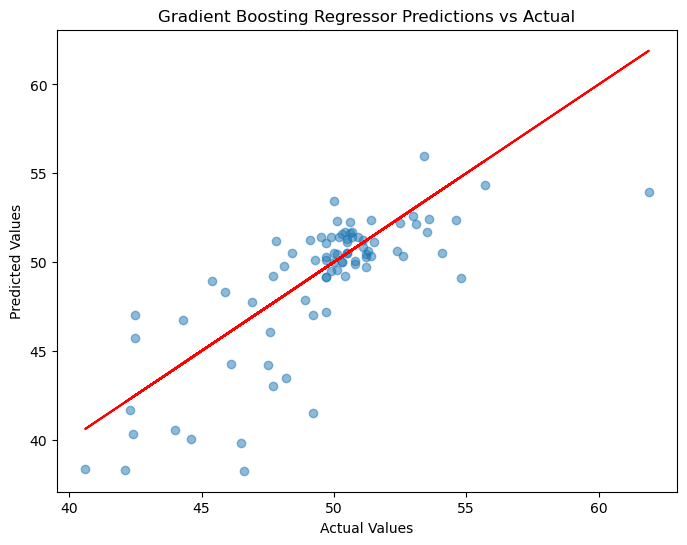

GB tuned:
 Mean Absolute Error: 1.77
 Mean Squared Error: 6.05
 Root Mean Squared Error: 2.46
 R-squared: 0.46



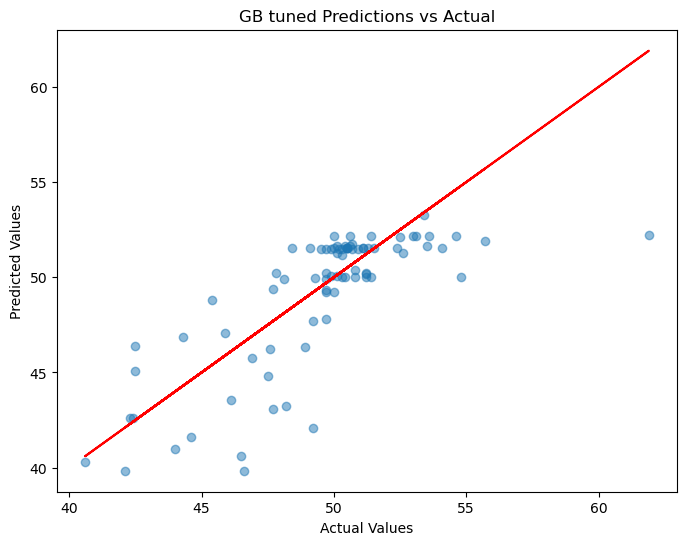

In [18]:
model_accuracy_comparison_and_plot(coordinates_train, added_ratio_train, coordinates_test, added_ratio_test)

Decision Tree:
 Mean Absolute Error: 2.19
 Mean Squared Error: 9.21
 Root Mean Squared Error: 3.03
 R-squared: 0.18



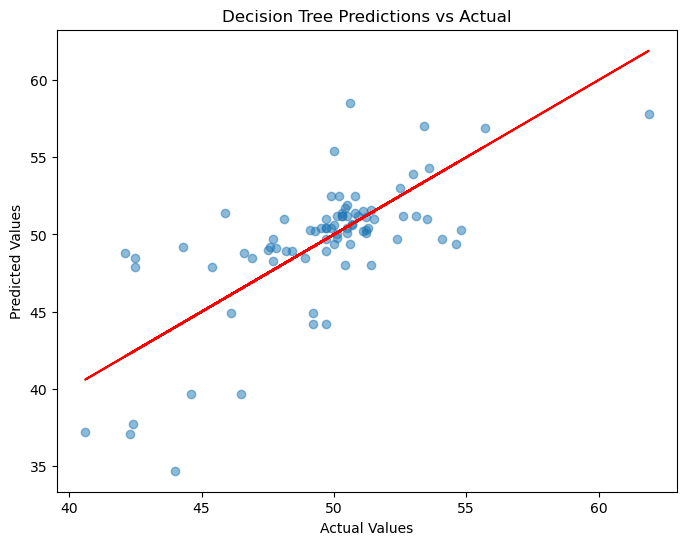

Gradient Boosting Regressor:
 Mean Absolute Error: 1.91
 Mean Squared Error: 6.95
 Root Mean Squared Error: 2.64
 R-squared: 0.38



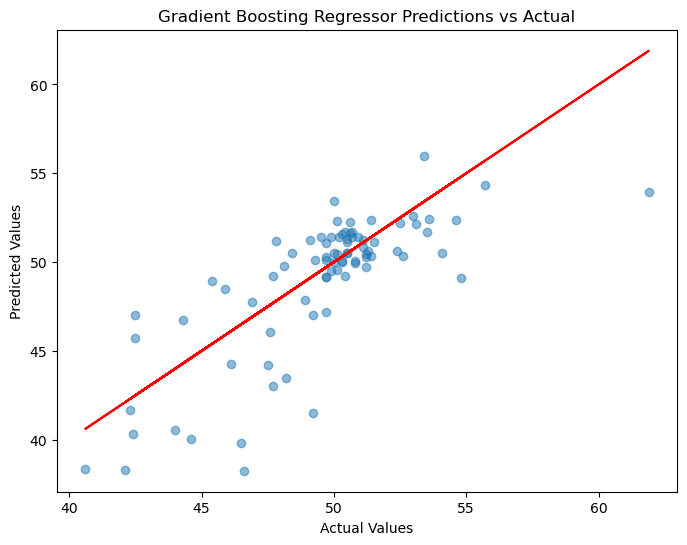

In [14]:
model_accuracy_comparison_and_plot(coordinates_train, added_ratio_train, coordinates_test, added_ratio_test)

Decision Tree:
 Mean Absolute Error: 718.84
 Mean Squared Error: 1487642.39
 Root Mean Squared Error: 1219.69
 R-squared: 0.43



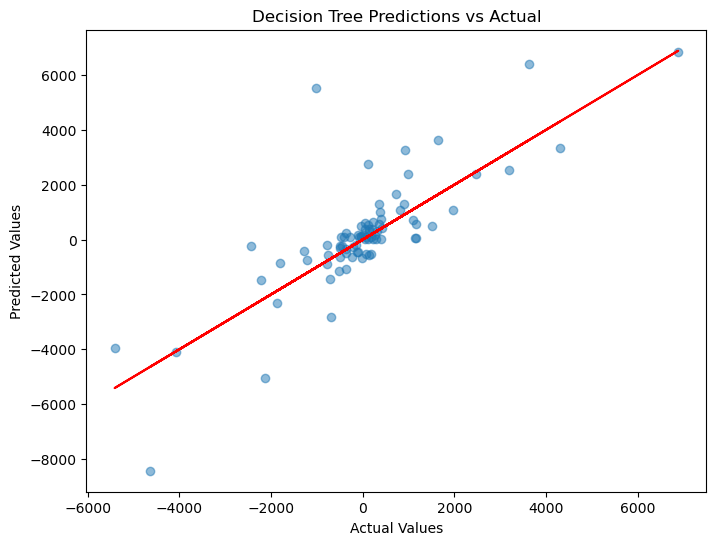

Gradient Boosting Regressor:
 Mean Absolute Error: 813.08
 Mean Squared Error: 1180013.19
 Root Mean Squared Error: 1086.28
 R-squared: 0.55



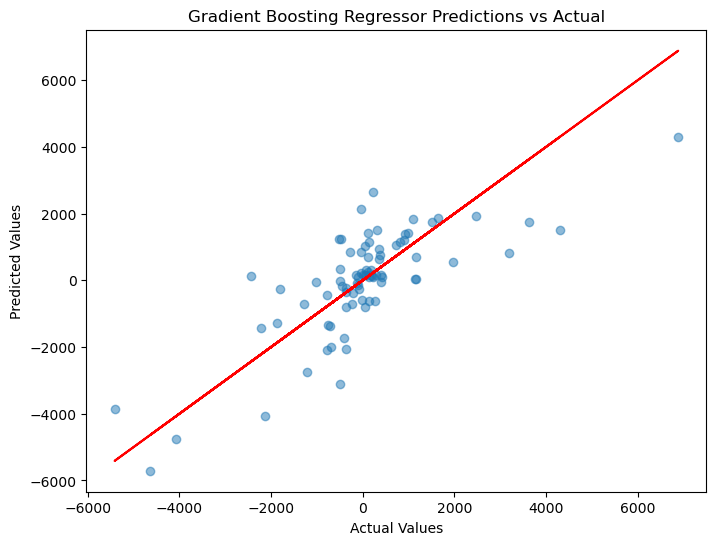

In [15]:
model_accuracy_comparison_and_plot(co_train, net_total_train, co_test, net_total_test)

Decision Tree:
 Mean Absolute Error: 742.08
 Mean Squared Error: 1284371.05
 Root Mean Squared Error: 1133.30
 R-squared: 0.51



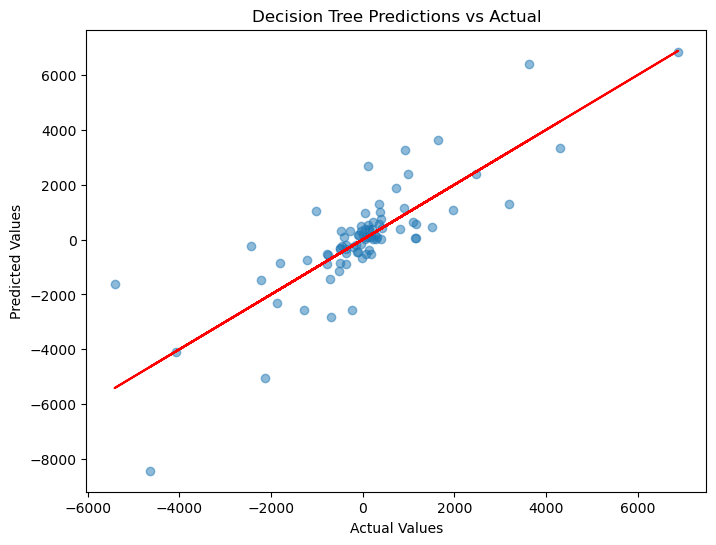

Gradient Boosting Regressor:
 Mean Absolute Error: 810.51
 Mean Squared Error: 1175369.50
 Root Mean Squared Error: 1084.14
 R-squared: 0.55



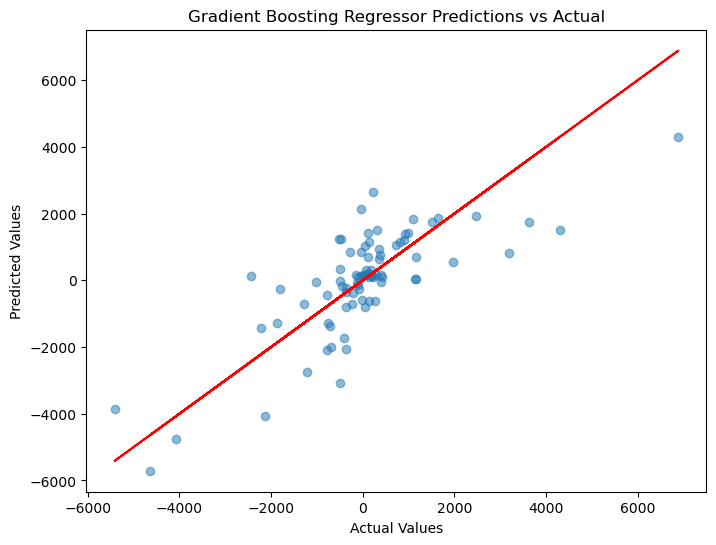

GB tuned:
 Mean Absolute Error: 776.42
 Mean Squared Error: 1163622.81
 Root Mean Squared Error: 1078.71
 R-squared: 0.55



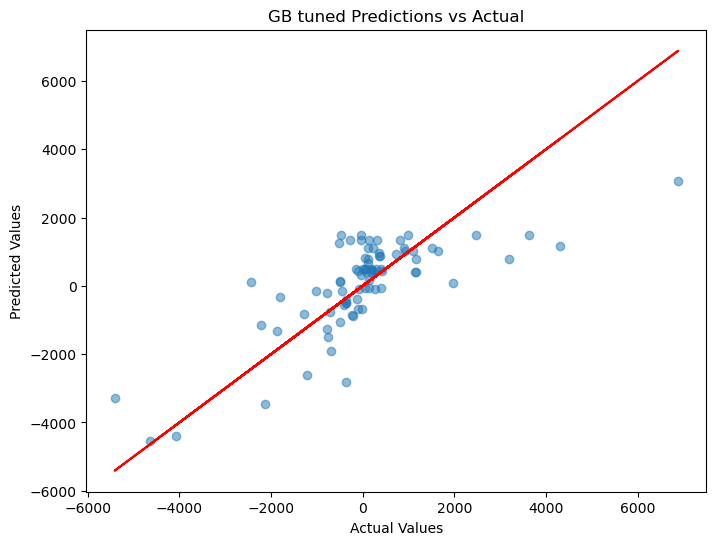

GB tuned net:
 Mean Absolute Error: 721.80
 Mean Squared Error: 979475.29
 Root Mean Squared Error: 989.68
 R-squared: 0.62



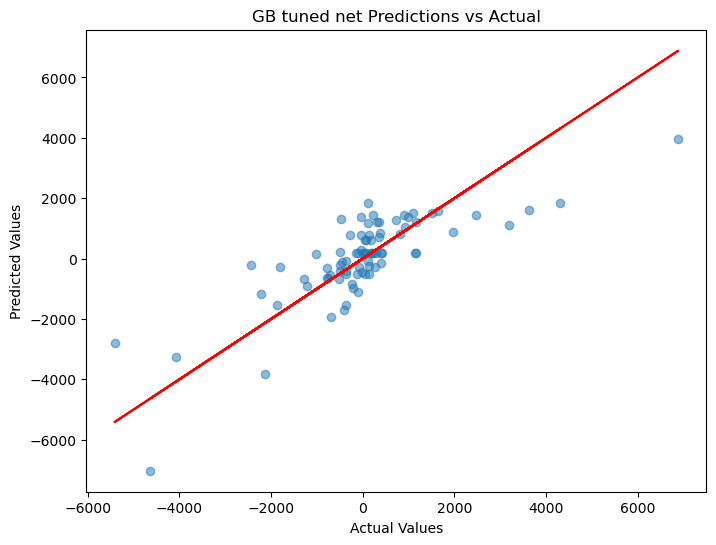

In [21]:
model_accuracy_comparison_and_plot(co_train, net_total_train, co_test, net_total_test)

In [16]:
from sklearn.model_selection import GridSearchCV

# Example for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(coordinates_train, added_ratio_train)

# best_params_ gives the best parameters found by GridSearchCV
print(grid_search.best_params_)


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [19]:
from sklearn.model_selection import GridSearchCV

# Example for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(coordinates_train, net_total_train)

# best_params_ gives the best parameters found by GridSearchCV
print(grid_search.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
